In [43]:
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

# Loading the dataset from the /data folder here 
data_path = 'data/C379_ESE_Dataset.csv'

# Read your csv file here ...
currentdf  = pd.read_csv(data_path, engine="python")

#converting the datetime to the integer.(Epoch Unix) 
currentdf['DateTime'] = pd.to_datetime(currentdf['DateTime']).dt.tz_localize(tz='Asia/Singapore')
currentdf['DateTime'] = currentdf['DateTime'].astype({'DateTime':'int64'})

#currentdf['Hour'] = currentdf['DateTime']
#currentdf['Hour'] = pd.to_datetime(currentdf['DateTime']).dt.hour

# Allocate your training data and label 
x = currentdf.iloc[:, [True,False,True,True,True,False,True]]
y = currentdf.iloc[:, 5]

# Splitting dataset into 75% for training and 25% for testing here ...
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

# Display the features and label from the training set 
print (X_train)
print (y_train)

# Insert code to standardize your dataset here ...
mean = np.mean(X_train)
stddev = np.std(X_train)
X_train_sc = (X_train - mean) / stddev
X_test_sc = (X_test - mean) / stddev

       Sno  Temperature    PH    EC             DateTime
1903  2046        23.37  7.64  2.23  1652225070460000000
5358  5501        24.25  8.22  1.63  1655350541887000000
5248  5391        24.19  8.13  1.72  1655251541477000000
1025  1168        23.37  8.16  1.52  1651424082973000000
3276  3419        23.56  7.75  2.14  1653461675727000000
3889  4032        25.37  8.30  1.40  1654016214340000000
6218  6361        22.81  7.89  2.11  1656132912877000000
597    740        23.44  7.94  1.96  1651038881190000000
1058  1201        23.37  7.94  1.93  1651453782877000000
4471  4614        25.87  8.19  1.49  1654540016567000000
3864  4007        25.37  8.35  1.37  1653993714430000000
5832  5975        23.56  7.83  2.02  1655785511433000000
4817  4960        24.37  7.91  2.14  1654861581553000000
942   1085        23.37  7.94  1.72  1651349382670000000
868   1011        23.37  8.13  1.52  1651282782227000000
2909  3052        23.31  8.05  1.57  1653131374300000000
4135  4278        25.62  8.35  

In [44]:
# Import necessary scikit-learn libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# instantiate model
bnb = BernoulliNB(binarize=0.0)

#Train the model and create predictions
bnb.fit(X_train_sc, y_train)

# Predicting on the train dataset 
y_pred_train = bnb.predict(X_train_sc)
train_acc = accuracy_score(y_train, y_pred_train)

# Predicting on the test dataset 
y_pred_test = bnb.predict(X_test_sc)
test_acc = accuracy_score(y_test, y_pred_test)

# Print training accuracy
print("Training Accuracy: " + str(train_acc))

# Print testing accuracy
print("Test Accuracy: " + str(test_acc))

Training Accuracy: 0.5225846925972396
Test Accuracy: 0.5379310344827586


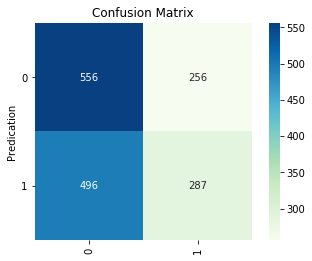

Model Score 0.5379310344827586


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Determine the accuracy of the model
score = bnb.score(X_test_sc, y_test)

# Provide necessary label
class_label=[0, 1]



cm = confusion_matrix(y_test, gnb.predict(X_test_sc), labels=class_label)

axes = sns.heatmap(cm, square=True, annot=True, fmt ='d', cbar=True, cmap=plt.cm.GnBu)
axes.set_ylabel('Actual')
axes.set_ylabel('Predication')
tick_marks = np.arange(len(class_label)) + 0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_label, rotation = 90)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_label, rotation = 0)
axes.set_title('Confusion Matrix')
plt.show()

print("Model Score {}" .format(score))

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print ("Accuracy: {:0.1f}%, Precision: {:0.1f}%, Recall: {:0.1f}%, F1 Score: {:0.1f}%".format(100*accuracy, 100* precision, 100*recall, 100*f1))

Accuracy: 53.8%, Precision: 53.7%, Recall: 53.7%, F1 Score: 53.5%


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

params_NB = {'binarize':np.logspace(0,-9, num=100)} 
            

gnb_grid = GridSearchCV(estimator=bnb, param_grid=params_NB, n_jobs=-1)
search = gnb_grid.fit(X_train_sc, y_train)
search.best_params_

{'binarize': 0.657933224657568}

In [39]:
# instantiate the model (using the default parameters)
tune = BernoulliNB(binarize=0.657933224657568)

# Use the training data to train the predictor
tune.fit(X_train_sc, y_train)

# Predicting on the train dataset
y_pred_train = tune.predict(X_train_sc)   

# Predicting on the test dataset
y_pred_test = tune.predict(X_test_sc)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracyTune = accuracy_score(y_test, y_pred_test)
precisionTune = precision_score(y_test, y_pred_test, average='macro')
recallTune = recall_score(y_test, y_pred_test, average='macro')
f1Tune = f1_score(y_test, y_pred_test, average='macro')

print ("Accuracy: {:0.1f}%, Precision: {:0.1f}%, Recall: {:0.1f}%, F1 Score: {:0.1f}%".format(100*accuracyTune, 100* precisionTune, 100*recallTune, 100*f1Tune))

Accuracy: 56.8%, Precision: 57.5%, Recall: 56.5%, F1 Score: 55.2%


In [40]:
model_filename= "./model/bnb.mdl"
with open(model_filename, "wb") as file:
    pk.dump(bnb, file)
print("Model Saved")

Model Saved
